In [1]:
import xarray as xr

import numpy as np
import pandas as pd
from pathlib import Path

import os, sys
import glob

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as tkr
#import seaborn as sns
#sns.set_style('ticks')

from scipy import stats
from scipy.stats import percentileofscore

from datetime import datetime, timedelta

from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#from sklearn.datasets import fetch_california_housing

In [4]:
# def multilin(X,y,scale=0):
#     X_train, X_test= np.split(X, [int(.67 *len(X))])
#     y_train, y_test= np.split(y, [int(.67 *len(X))])
#     model = LinearRegression()
#     if scale ==1:
#         scaler1 = StandardScaler().set_output(transform="pandas")
#         scaled_X_train = scaler1.fit_transform(X_train)
#         model.fit(scaled_X_train, y_train)
#         scaled_X_test = scaler1.fit_transform(X_test)
#         y_pred = model.predict(scaled_X_test)
#     elif scale==2:
#         scaler2 = MinMaxScaler().set_output(transform="pandas")
#         scaled_X_train = scaler2.fit_transform(X_train)
#         model.fit(scaled_X_train, y_train)
#         scaled_X_test = scale2.fit_transform(X_test)
#         y_pred = model.predict(scaled_X_test)
#     elif scale==0:
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)
#     a={
#     "Variable":[str(i) for i in X.keys()],
#     "Coeffcient":np.array(model.coef_)
#     }
#     coeff_df=pd.DataFrame(a)
#     print(coeff_df)
    
#     y_test_plot=y_test.reset_index() #so when I plot they appear on top of eachother
#     fig, ax =plt.subplots()
#     ax.plot(y_test_plot.Residual,label='real data')
#     ax.plot(y_pred,label='model prediction')
#     fig.legend()
#     print('R2 = '+str(r2_score(y_test,y_pred)))
#     print('MSE = '+str(mean_squared_error(y_test, y_pred)))
#     print('MAE = '+str(mean_absolute_error(y_test, y_pred)))

In [5]:
def multilin(X,y,scale=0):
    model = LinearRegression()
    y_train, y_test= np.split(y, [int(.67 *len(X))])
    if scale ==1:
        scaler1 = StandardScaler().set_output(transform="pandas")
        scaled_X1=scaler1.fit_transform(X)
        X_train, X_test= np.split(scaled_X1, [int(.67 *len(X))])     
    elif scale==2:
        scaler2 = MinMaxScaler().set_output(transform="pandas")
        scaled_X2=scaler2.fit_transform(X)
        X_train, X_test= np.split(scaled_X2, [int(.67 *len(X))]) 
    else:
        X_train, X_test= np.split(X, [int(.67 *len(X))]) 

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    a={
    "Variable":[str(i) for i in X.keys()],
    "Coeffcient":np.array(model.coef_)
    }
    coeff_df=pd.DataFrame(a)
    print(coeff_df)
    
    y_test_plot=y_test.reset_index() #so when I plot they appear on top of eachother
    fig, ax =plt.subplots()
    ax.plot(y_test_plot.Residual,label='real data')
    ax.plot(y_pred,label='model prediction')
    fig.legend()
    print('R2 = '+str(r2_score(y_test,y_pred)))
    print('MSE = '+str(mean_squared_error(y_test, y_pred)))
    print('MAE = '+str(mean_absolute_error(y_test, y_pred)))

Do an initial test of the multilinear regression for non tidal residuals for Monterey bay 

The compiled csv is created in /global/scratch/users/jennaisrael/climate_data_processing/sl_regression/compile_regression_data.ipynb

In [2]:
df_m=pd.read_csv("/global/scratch/users/jennaisrael/climate_data_processing/sl_regression/monterey.regression.data.hourly.1996.2020.csv",parse_dates=['time']).set_index(['time'])
#the variable "Residual" is what we want it is calculated by subtracting from utide predicted tide, see notebook global
#/scratch/users/jennaisrael/climate_data_processing/sl_regression/detrended_residuals_utide.ipynb
df_pr=pd.read_csv("/global/scratch/users/jennaisrael/climate_data_processing/sl_regression/point_reyes.regression.data.hourly.1996.2020.csv",parse_dates=['time']).set_index(['time'])
df_m

,u10_stress_a,v10_stress_a,msl_a,sst_a,PDO_a,EN3.4_a,Residual
time,,,,,,,
1995-12-31 16:00:00,8.956125,-43.981939,736.900563,0.659997,0.836933,-1.306148,-0.041708
1995-12-31 17:00:00,5.255560,-33.640463,771.835528,0.659997,0.836933,-1.306148,-0.049622
1995-12-31 18:00:00,4.653470,-29.136661,734.585493,0.659997,0.836933,-1.306148,-0.050717
1995-12-31 19:00:00,7.100264,-24.445409,689.835457,0.659997,0.836933,-1.306148,-0.043857
1995-12-31 20:00:00,15.985210,-32.178663,623.085422,0.659997,0.836933,-1.306148,-0.056559
...,...,...,...,...,...,...,...
2021-10-01 19:00:00,-1.437500,0.301881,-145.706222,1.620365,-2.707063,-1.352207,-0.005646
2021-10-01 20:00:00,1.117509,-0.157175,-153.396257,1.620364,-2.707063,-1.352207,-0.015753
2021-10-01 21:00:00,1.308850,0.070465,-179.146292,1.620364,-2.707063,-1.352207,-0.019239


# Monterey bay

In [7]:
#drop the nan first
df_m_clean=df_m.dropna()

In [8]:
X = df_m_clean[["u10_stress_a","v10_stress_a","msl_a","sst_a","PDO_a","EN3.4_a"]] #also leave date out for now
y = df_m_clean["Residual"]
X

,u10_stress_a,v10_stress_a,msl_a,sst_a,PDO_a,EN3.4_a
time,,,,,,
1995-12-31 16:00:00,8.956125,-43.981939,736.900563,0.659997,0.836933,-1.306148
1995-12-31 17:00:00,5.255560,-33.640463,771.835528,0.659997,0.836933,-1.306148
1995-12-31 18:00:00,4.653470,-29.136661,734.585493,0.659997,0.836933,-1.306148
1995-12-31 19:00:00,7.100264,-24.445409,689.835457,0.659997,0.836933,-1.306148
1995-12-31 20:00:00,15.985210,-32.178663,623.085422,0.659997,0.836933,-1.306148
...,...,...,...,...,...,...
2021-10-01 19:00:00,-1.437500,0.301881,-145.706222,1.620365,-2.707063,-1.352207
2021-10-01 20:00:00,1.117509,-0.157175,-153.396257,1.620364,-2.707063,-1.352207
2021-10-01 21:00:00,1.308850,0.070465,-179.146292,1.620364,-2.707063,-1.352207


       Variable    Coeffcient
0  u10_stress_a  2.526477e-07
1  v10_stress_a  7.884429e-04
2         msl_a -7.516457e-05
3         sst_a  6.254515e-03
4         PDO_a  1.404659e-02
5       EN3.4_a  1.635743e-02
R2 = 0.5651322811243191
MSE = 0.0018427859040216297
MAE = 0.034066375549101406


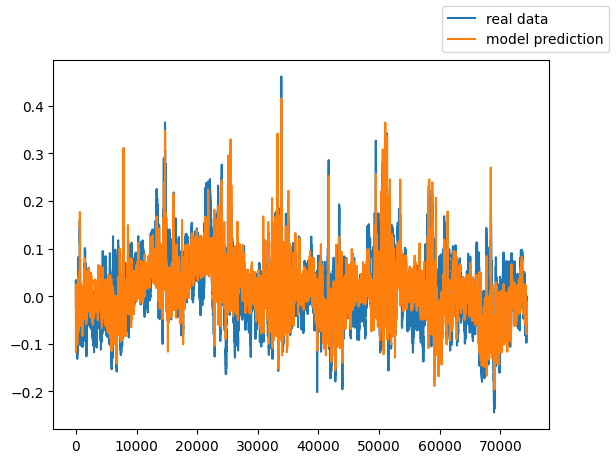

In [9]:
multilin(X,y)

In [10]:
multilin(X,y,scale=1)

AttributeError: 'StandardScaler' object has no attribute 'set_output'

In [ ]:
multilin(X,y,scale=2)

In [ ]:
X_train, X_test= np.split(X, [int(.67 *len(X))])
y_train, y_test= np.split(y, [int(.67 *len(X))])

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

In [ ]:
print(model.coef_)
print(model.intercept_)

In [ ]:
a={
    "Variable":[str(i) for i in X.keys()],
    "Coeffcient":np.array(model.coef_)
}
hourly_m_me=pd.DataFrame(a)
hourly_m_me

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_test_plot=y_test.reset_index() #so when I plot they appear on top of eachother

fig, ax =plt.subplots()

ax.plot(y_test_plot.Residual,label='real data')
ax.plot(y_pred,label='model prediction')
fig.legend()

In [ ]:
r2_score(y_test,y_pred)


In [ ]:
mean_squared_error(y_test, y_pred)


In [ ]:
mean_absolute_error(y_test, y_pred)


# These statistics are worse than Sams, try down sampling to daily and trying again


In [ ]:
#resample the whole dataframe and then drop na again

In [8]:
df_m_daily_clean=df_m.resample("1D").mean().dropna()

In [ ]:
X = df_m_daily_clean[["u10_stress_a","v10_stress_a","msl_a","sst_a","PDO_a","EN3.4_a"]] #also leave date out for now
y = df_m_daily_clean["Residual"]
X

In [ ]:
multilin(X,y)

In [ ]:
multilin(X,y,scale=1)

In [ ]:
multilin(X,y,scale=2)

In [ ]:
X_train, X_test= np.split(X, [int(.67 *len(X))])
y_train, y_test= np.split(y, [int(.67 *len(X))])

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

In [ ]:
print(model.coef_)
print(model.intercept_)

In [ ]:
a={
    "Variable":[str(i) for i in X.keys()],
    "Coeffcient":np.array(model.coef_)
}
daily_m_me=pd.DataFrame(a)
daily_m_me

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

In [ ]:
y_test_plot=y_test.reset_index() #so when I plot they appear on top of eachother

fig, ax =plt.subplots()

ax.plot(y_test_plot.Residual,label='real data')
ax.plot(y_pred,label='model prediction')
fig.legend()

# Try Scaling the variables to better partition the variance 

In [ ]:
scaler = StandardScaler().set_output(transform="pandas")

In [ ]:
X = df_m_clean[["u10_stress_a","v10_stress_a","msl_a","sst_a","PDO_a","EN3.4_a"]] #also leave date out for now
y = df_m_clean["Residual"]
X_train, X_test= np.split(X, [int(.67 *len(X))])
y_train, y_test= np.split(y, [int(.67 *len(X))])

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)

In [ ]:
model = LinearRegression()

model.fit(scaled_X_train, y_train)

In [ ]:
a={
    "Variable":[str(i) for i in X.keys()],
    "Coeffcient":np.array(model.coef_)
}
hourly_m_me_scaled=pd.DataFrame(a)
hourly_m_me

In [ ]:
scaled_X_test = scaler.fit_transform(X_test)
y_pred = model.predict(scaled_X_test)

In [ ]:
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

# Still not so good, try for daily 

In [ ]:
X = df_m_daily_clean[["u10_stress_a","v10_stress_a","msl_a","sst_a","PDO_a","EN3.4_a"]] #also leave date out for now
y = df_m_daily_clean["Residual"]
X_train, X_test= np.split(X, [int(.67 *len(X))])
y_train, y_test= np.split(y, [int(.67 *len(X))])

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)

In [ ]:
model = LinearRegression()

model.fit(scaled_X_train, y_train)

In [ ]:
a={
    "Variable":[str(i) for i in X.keys()],
    "Coeffcient":np.array(model.coef_)
}
daily_m_me_scaled=pd.DataFrame(a)
daily_m_me_scaled

In [ ]:
scaled_X_test = scaler.fit_transform(X_test)
y_pred = model.predict(scaled_X_test)

In [ ]:

print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

# Try dropping PDO

In [ ]:
X = df_m_clean[["u10_stress_a","v10_stress_a","msl_a","sst_a","EN3.4_a"]] #also leave date out for now
y = df_m_clean["Residual"]
X

In [ ]:
multilin(X,y)

In [ ]:
multilin(X,y,scale=1)

# What if I change the order I pass the variables 

In [ ]:
X_reorder = df_m_clean[["msl_a","sst_a","EN3.4_a","u10_stress_a","v10_stress_a"]] #also leave date out for now
y_reorder = df_m_clean["Residual"]
X_reorder

In [ ]:
multilin(X_reorder,y_reorder)

In [ ]:
multilin(X_reorder,y_reorder,scale=1)

# Sam's Data

Variables we will use in the regression: sea-level pressure (PSL), windstress from u, windstress from v, ENSO index, PDO index, air temperature (if I can pick an on land location that is close enough, masked out for the ocean)

In [3]:
#now compare with Sam's residuals
mb_sam=pd.read_fwf("/global/scratch/users/jennaisrael/time_varying_data/slr_data_sam/data4regrbuild.daily.era5.monterey.norm0.txt")
mb_sam.columns=["Year", "Month", "Day", "ResWL_lo", "ResWL_hi", "SLPa", "TASa", "N34a", "PDOa", "U10a", "V10a"]
mb_sam["date"]=pd.to_datetime(mb_sam[['Year', 'Month', 'Day']])
#datetime seems to be causing an issue leave it from the index for now
mb_sam.index=mb_sam["date"]
mb_sam["Residual"]=mb_sam["ResWL_hi"]+mb_sam["ResWL_lo"]
mb_sam

,Year,Month,Day,ResWL_lo,ResWL_hi,SLPa,TASa,N34a,PDOa,U10a,V10a,date,Residual
date,,,,,,,,,,,,,
1973-11-12,1973,11,12,-0.02788,0.05941,-2.01526,1.15286,-2.07505,-1.28235,0.58345,62.36506,1973-11-12,0.03153
1973-11-13,1973,11,13,-0.02278,0.01739,0.51379,0.14197,-2.08711,-1.28528,-10.66715,35.28530,1973-11-13,-0.00539
1973-11-14,1973,11,14,-0.01262,-0.03827,2.04980,0.37289,-2.09914,-1.28824,-9.67575,30.52757,1973-11-14,-0.05089
1973-11-15,1973,11,15,-0.00850,-0.06106,2.26141,0.08441,-2.11116,-1.29122,-12.71806,30.81868,1973-11-15,-0.06956
1973-11-16,1973,11,16,-0.02547,0.00956,-3.54065,0.87811,-2.11025,-1.27463,-8.62905,67.52818,1973-11-16,-0.01591
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,2020,12,27,-0.00009,0.01417,-1.68414,-1.22424,-1.32486,-0.91245,-1.72206,2.64090,2020-12-27,0.01408
2020-12-28,2020,12,28,0.00145,0.13299,-12.65814,-1.16611,-1.32366,-0.91397,9.90384,20.82512,2020-12-28,0.13444
2020-12-29,2020,12,29,0.00355,0.00568,0.04828,-0.54269,-1.32248,-0.91541,10.16266,-30.99345,2020-12-29,0.00923


# Compare the independent variables for my and Sam's data

(9495.0, 18921.0)

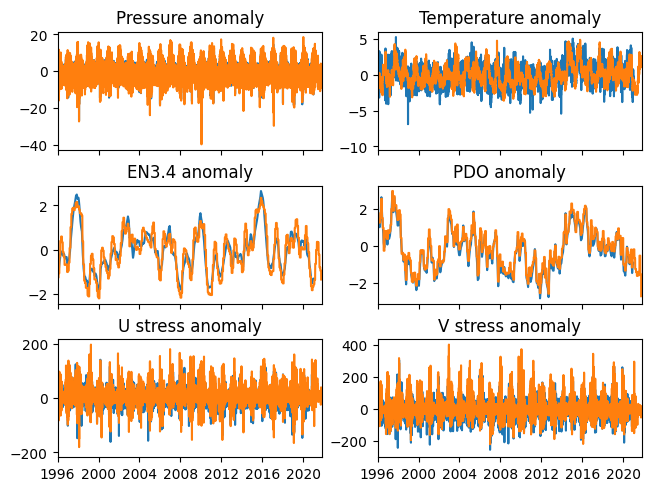

In [4]:
fig, ax = plt.subplots(3,2, sharex=True,layout="constrained")
ax[0,0].plot(mb_sam.SLPa,label='Sam SLP anomaly')
ax[0,0].plot(df_m.msl_a*0.01,label='My msl anomaly')
ax[0,0].set_title("Pressure anomaly")

ax[0,1].plot(mb_sam.TASa,label='Sam TAS anomaly')
ax[0,1].plot(df_m.sst_a,label='My sst anomaly')
ax[0,1].set_title("Temperature anomaly")

ax[1,0].plot(mb_sam.N34a,label='Sam N34 anomaly')
ax[1,0].plot(df_m["EN3.4_a"],label='My EN3.4 anomaly')
ax[1,0].set_title("EN3.4 anomaly")

ax[1,1].plot(mb_sam.PDOa,label='Sam PDO anomaly')
ax[1,1].plot(df_m["PDO_a"],label='My PDO anomaly')
ax[1,1].set_title("PDO anomaly")

ax[2,0].plot(mb_sam.U10a,label='Sam u stress anomaly')
ax[2,0].plot(df_m["u10_stress_a"],label='My u stress anomaly')
ax[2,0].set_title("U stress anomaly")

ax[2,1].plot(mb_sam.V10a,label='Sam v stress anomaly')
ax[2,1].plot(df_m["v10_stress_a"],label='My v stress anomaly')
ax[2,1].set_title("V stress anomaly")

ax[0,0].set_xlim(datetime(1995,12,31),datetime(2021,10,21))

(9495.0, 18921.0)

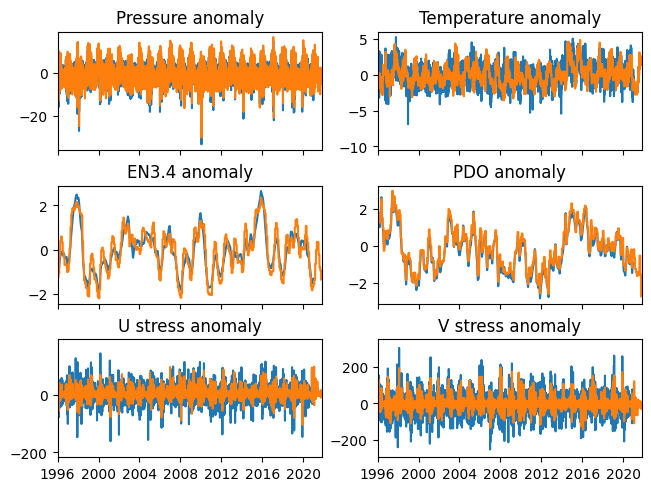

In [9]:
fig, ax = plt.subplots(3,2, sharex=True,layout="constrained")
ax[0,0].plot(mb_sam.SLPa,label='Sam SLP anomaly')
ax[0,0].plot(df_m_daily_clean.msl_a*0.01,label='My msl anomaly')
ax[0,0].set_title("Pressure anomaly")

ax[0,1].plot(mb_sam.TASa,label='Sam TAS anomaly')
ax[0,1].plot(df_m_daily_clean.sst_a,label='My sst anomaly')
ax[0,1].set_title("Temperature anomaly")

ax[1,0].plot(mb_sam.N34a,label='Sam N34 anomaly')
ax[1,0].plot(df_m_daily_clean["EN3.4_a"],label='My EN3.4 anomaly')
ax[1,0].set_title("EN3.4 anomaly")

ax[1,1].plot(mb_sam.PDOa,label='Sam PDO anomaly')
ax[1,1].plot(df_m_daily_clean["PDO_a"],label='My PDO anomaly')
ax[1,1].set_title("PDO anomaly")

ax[2,0].plot(mb_sam.U10a,label='Sam u stress anomaly')
ax[2,0].plot(df_m_daily_clean["u10_stress_a"],label='My u stress anomaly')
ax[2,0].set_title("U stress anomaly")

ax[2,1].plot(mb_sam.V10a,label='Sam v stress anomaly')
ax[2,1].plot(df_m_daily_clean["v10_stress_a"],label='My v stress anomaly')
ax[2,1].set_title("V stress anomaly")

ax[0,0].set_xlim(datetime(1995,12,31),datetime(2021,10,21))

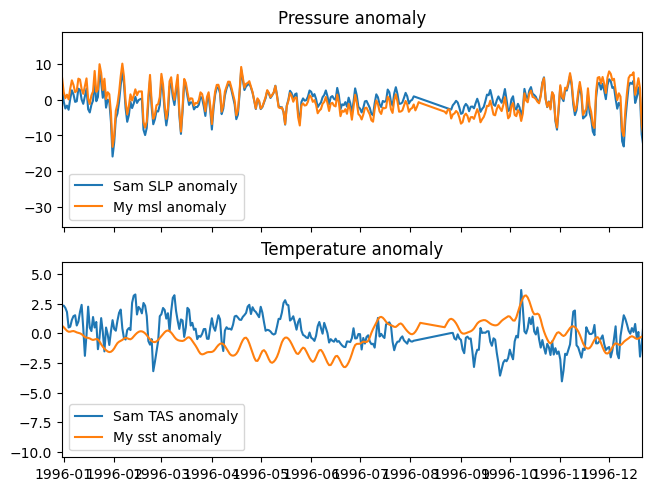

In [10]:
#zoom in on the pressure anomaly
fig, ax = plt.subplots(2,sharex=True,layout="constrained")
ax[0].plot(mb_sam.SLPa,label='Sam SLP anomaly')
ax[0].plot(df_m_daily_clean.msl_a*0.01,label='My msl anomaly')
ax[0].set_title("Pressure anomaly")

ax[1].plot(mb_sam.TASa,label='Sam TAS anomaly')
ax[1].plot(df_m_daily_clean.sst_a,label='My sst anomaly')
ax[1].set_title("Temperature anomaly")

ax[1].set_xlim(datetime(1995,12,31),datetime(1996,12,21))
ax[0].legend()
ax[1].legend()

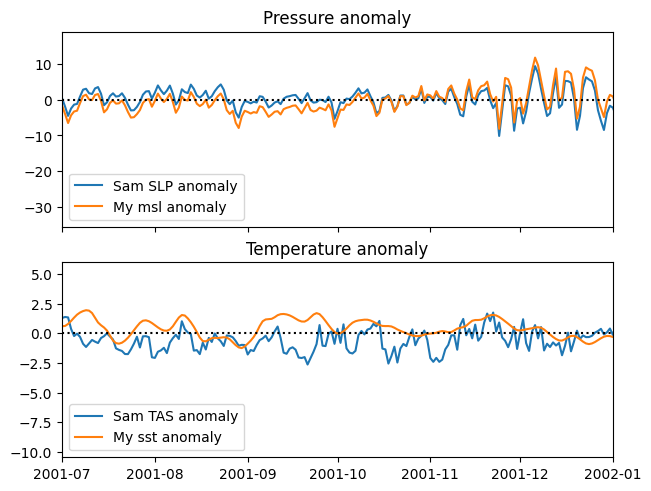

In [12]:
# Zoom in is pressure fluctuating symmetrically on a daily scale?
fig, ax = plt.subplots(2,sharex=True,layout="constrained")
ax[0].plot(mb_sam.SLPa,label='Sam SLP anomaly')
ax[0].plot(df_m_daily_clean.msl_a*0.01,label='My msl anomaly')
ax[0].axhline(y=0, color = 'k',linestyle=':')
ax[0].set_title("Pressure anomaly")

ax[1].plot(mb_sam.TASa,label='Sam TAS anomaly')
ax[1].plot(df_m_daily_clean.sst_a,label='My sst anomaly')
ax[1].axhline(y=0, color = 'k',linestyle=':')
ax[1].set_title("Temperature anomaly")

ax[1].set_xlim(datetime(2001,7,1),datetime(2002,1,1))
ax[0].legend()
ax[1].legend()

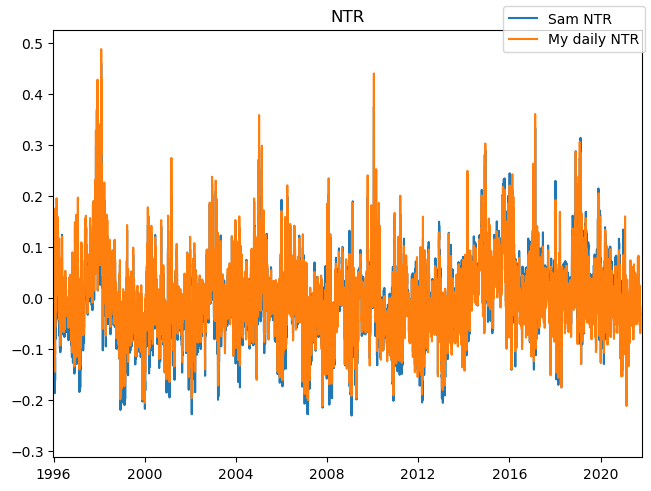

In [17]:
#look at the downsampled
fig, ax = plt.subplots(sharex=True,layout="constrained")
ax.plot(mb_sam.Residual,label='Sam NTR')
ax.plot(df_m_daily_clean.Residual,label='My daily NTR')
ax.set_title("NTR")
ax.set_xlim(datetime(1995,12,31),datetime(2021,10,21))
fig.legend()

Make a new dataframe replacing Sam's residual with mine, trimming to have the same start and end date 
This also requires resampling my residuals to be daily (ultimately they should be hourly)


for now just practice setting up the multilinear regression and doing train test split

In [32]:
X = mb_sam[["SLPa","TASa","N34a","U10a","V10a"]] #also leave date out for now
y = mb_sam["Residual"]

/global/home/users/jennaisrael/.conda/envs/geoplot/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/global/home/users/jennaisrael/.conda/envs/geoplot/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


  Variable  Coeffcient
0     SLPa   -0.011333
1     TASa    0.009908
2     N34a    0.026010
3     U10a    0.000165
4     V10a    0.000314
R2 = 0.709781932881713
MSE = 0.0014020667440802622
MAE = 0.029818487200237612


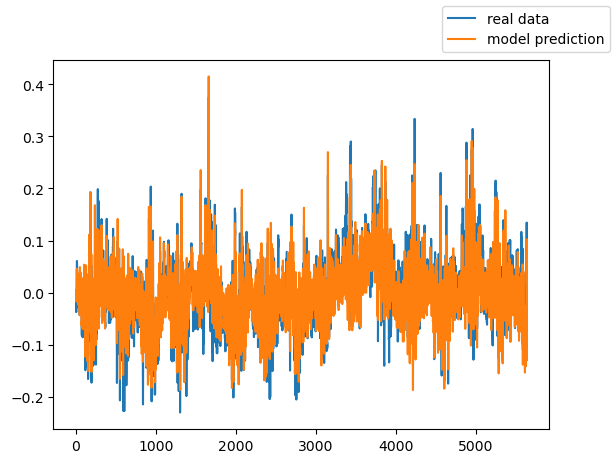

In [28]:
multilin(X,y)

/global/home/users/jennaisrael/.conda/envs/geoplot/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/global/home/users/jennaisrael/.conda/envs/geoplot/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


  Variable  Coeffcient
0     SLPa   -0.043202
1     TASa    0.012765
2     N34a    0.022680
3     U10a    0.003827
4     V10a    0.014768
R2 = 0.709781932881713
MSE = 0.0014020667440802625
MAE = 0.029818487200237612


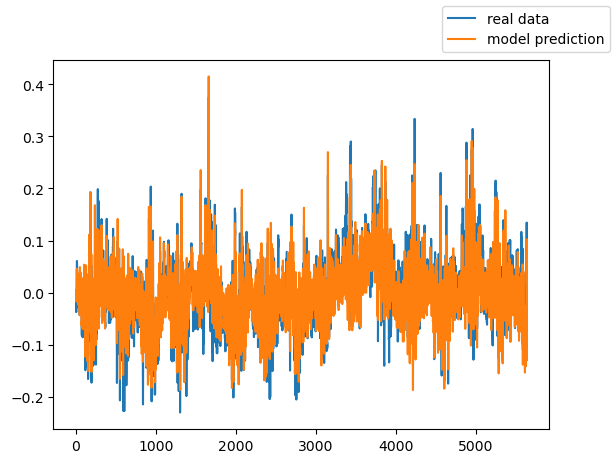

In [33]:
multilin(X,y,scale=1)

/global/home/users/jennaisrael/.conda/envs/geoplot/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/global/home/users/jennaisrael/.conda/envs/geoplot/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


  Variable  Coeffcient
0     SLPa   -0.548974
1     TASa    0.148058
2     N34a    0.123799
3     U10a    0.061215
4     V10a    0.186080
R2 = 0.7097819328817128
MSE = 0.0014020667440802633
MAE = 0.029818487200237616


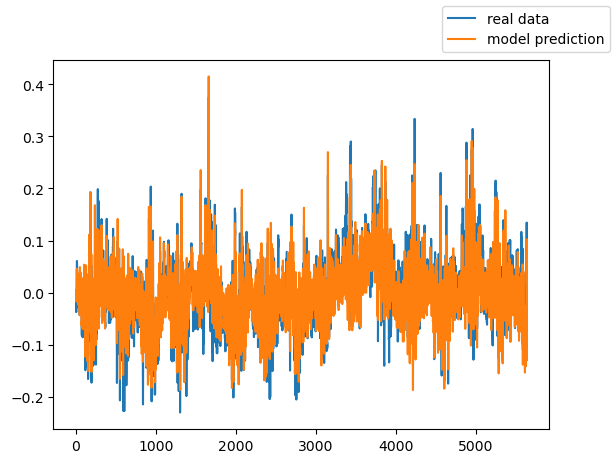

In [34]:
multilin(X,y,scale=2)

In [ ]:
multilin(X,y,scale=1)

In [26]:
X

,SLPa,TASa,N34a,U10a,V10a
0,-2.01526,1.15286,-2.07505,0.58345,62.36506
1,0.51379,0.14197,-2.08711,-10.66715,35.28530
2,2.04980,0.37289,-2.09914,-9.67575,30.52757
3,2.26141,0.08441,-2.11116,-12.71806,30.81868
4,-3.54065,0.87811,-2.11025,-8.62905,67.52818
...,...,...,...,...,...
17092,-1.68414,-1.22424,-1.32486,-1.72206,2.64090
17093,-12.65814,-1.16611,-1.32366,9.90384,20.82512
17094,0.04828,-0.54269,-1.32248,10.16266,-30.99345
17095,7.64056,-0.49118,-1.32132,2.84751,-3.36609


Try a simple single chronological train test split for now

In [27]:
X_train, X_test= np.split(X, [int(.67 *len(X))])
y_train, y_test= np.split(y, [int(.67 *len(X))])

/global/home/users/jennaisrael/.conda/envs/geoplot/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/global/home/users/jennaisrael/.conda/envs/geoplot/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


In [28]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [29]:
print(model.coef_)
print(model.intercept_)

[-0.01133269  0.00990764  0.02600962  0.00016498  0.00031364]
-0.003314660641348464


In [30]:
vars=[str(i) for i in X.keys()]
vars

['SLPa', 'TASa', 'N34a', 'U10a', 'V10a']

In [31]:
a={
    "Variable":[str(i) for i in X.keys()],
    "Coeffcient":np.array(model.coef_)
}
daily_m_sam=pd.DataFrame(a)
daily_m_sam

,Variable,Coeffcient
0,SLPa,-0.011333
1,TASa,0.009908
2,N34a,0.026010
3,U10a,0.000165
4,V10a,0.000314


In [32]:
y_pred = model.predict(X_test)

In [33]:
y_test_plot

,time,Residual
0,2013-04-07,-0.044949
1,2013-04-08,-0.003325
2,2013-04-09,-0.066127
3,2013-04-10,-0.076242
4,2013-04-11,-0.032052
...,...,...
3095,2021-09-27,-0.043967
3096,2021-09-28,-0.048825
3097,2021-09-29,-0.068648
3098,2021-09-30,-0.052942


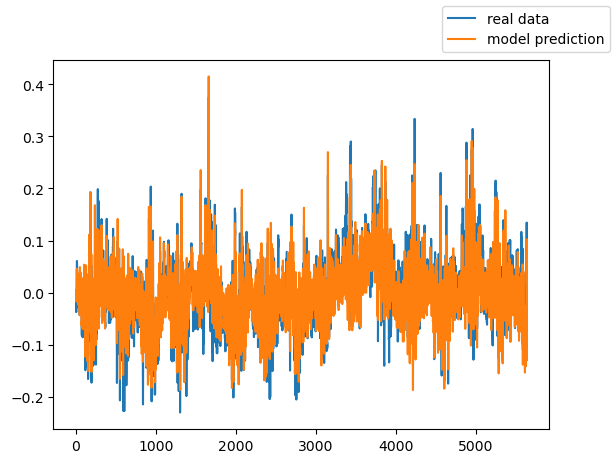

In [34]:
y_test_plot=y_test.reset_index() #so when I plot they appear on top of eachother

fig, ax =plt.subplots()

ax.plot(y_test_plot.ResWL_total,label='real data')
ax.plot(y_pred,label='model prediction')
fig.legend()

In [35]:
r2_score(y_test,y_pred)

0.709781932881713

In [36]:
mean_squared_error(y_test, y_pred)

0.0014020667440802622

In [37]:
mean_absolute_error(y_test, y_pred)

0.029818487200237612

In [38]:
test=xr.open_dataset("/global/scratch/users/jennaisrael/time_varying_data/test_cirrus/noaa_stdmet_46012_1996.nc")
test

ERROR 1: PROJ: proj_create_from_database: Open of /global/home/users/jennaisrael/.conda/envs/geoplot/share/proj failed


<xarray.Dataset> Size: 668kB
Dimensions:                  (time: 8784, latitude: 1, longitude: 1)
Coordinates:
  * time                     (time) datetime64[ns] 70kB 1996-01-01 ... 1996-1...
  * latitude                 (latitude) float32 4B 37.36
  * longitude                (longitude) float32 4B -122.9
Data variables: (12/13)
    wind_dir                 (time, latitude, longitude) float64 70kB ...
    wind_spd                 (time, latitude, longitude) float32 35kB ...
    gust                     (time, latitude, longitude) float32 35kB ...
    wave_height              (time, latitude, longitude) float32 35kB ...
    dominant_wpd             (time, latitude, longitude) timedelta64[ns] 70kB ...
    average_wpd              (time, latitude, longitude) timedelta64[ns] 70kB ...
    ...                       ...
    air_pressure             (time, latitude, longitude) float32 35kB ...
    air_temperature          (time, latitude, longitude) float32 35kB ...
    sea_surface_temperature  (time, latitude, longitude) float32 35kB ...
    dewpt_temperature        (time, latitude, longitude) float32 35kB ...
    visibility               (time, latitude, longitude) float32 35kB ...
    water_level              (time, latitude, longitude) float32 35kB ...

test data seems to be from a buoy in the pacific ocean https://www.ndbc.noaa.gov/station_page.php?station=46012, could be good for windstress?